In [ ]:
# from google.colab import files
# uploaded = files.upload()
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
df = pd.read_csv("home11_updated.csv")
df.head()

,area,bedrooms,age,price,location
0,2600,3.0,20,550000,Denver
1,3000,4.0,15,565000,Atlanta
2,3200,NaN,18,610000,Seattle
3,3600,3.0,30,595000,Los Angeles
4,4000,5.0,8,760000,San Francisco


In [ ]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

3

In [ ]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price,location
0,2600,3.0,20,550000,Denver
1,3000,4.0,15,565000,Atlanta
2,3200,3.0,18,610000,Seattle
3,3600,3.0,30,595000,Los Angeles
4,4000,5.0,8,760000,San Francisco
...,...,...,...,...,...
4995,4081,4.0,22,633479,Houston
4996,4486,4.0,17,662666,New York
4997,4740,3.0,9,566421,Atlanta
4998,4605,3.0,27,728803,San Francisco


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

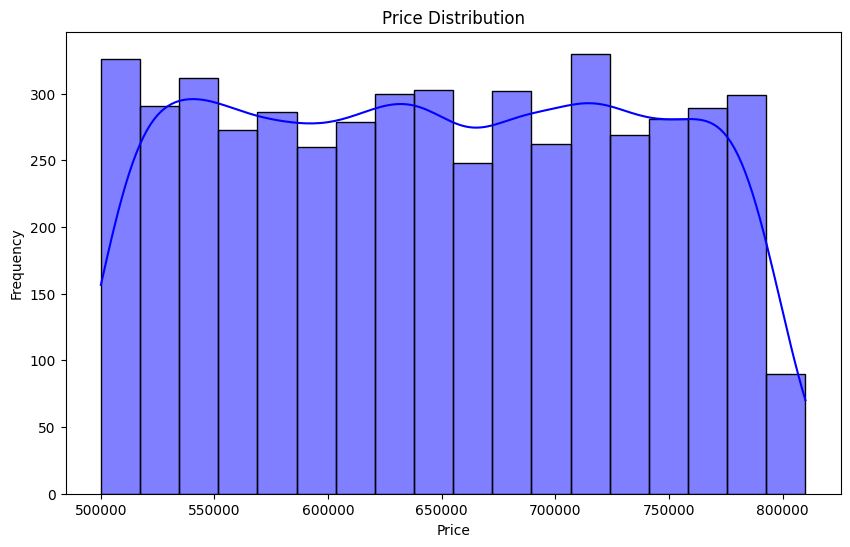

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

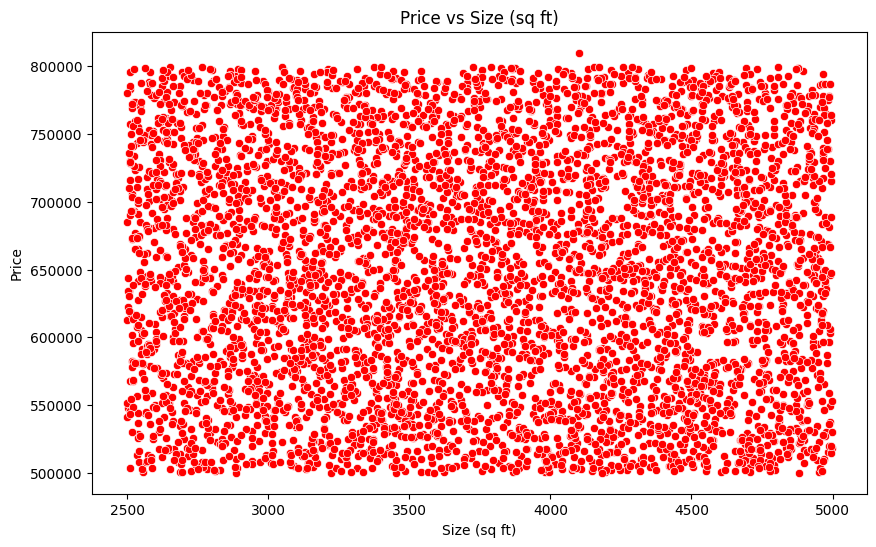

In [ ]:
gyn y plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df, color='red')
plt.title('Price vs Size (sq ft)')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price')
plt.show()

<ipython-input-46-f1ba8ecf90f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=df, palette='coolwarm')  # Changed 'Price' to 'price'


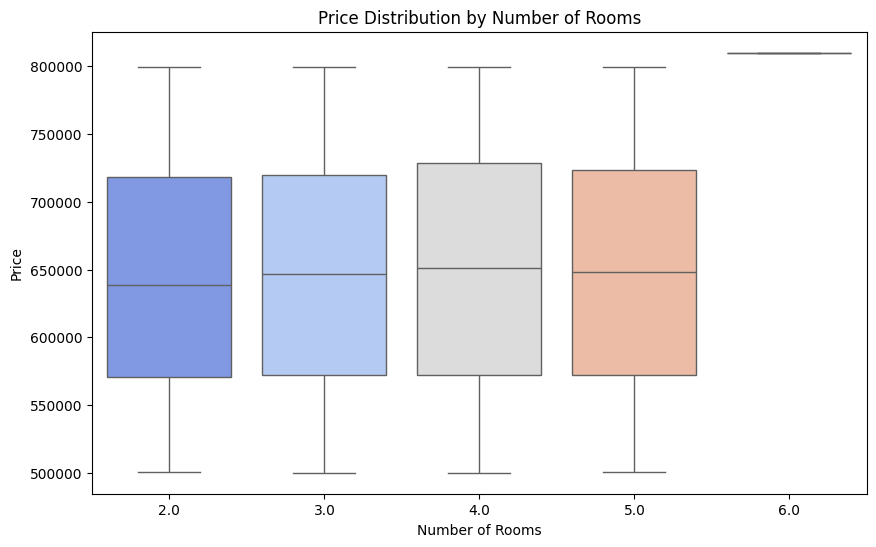

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df, palette='coolwarm')  # Changed 'Price' to 'price'
plt.title('Price Distribution by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

<ipython-input-47-532497b32638>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='price', data=df, palette='Set2')


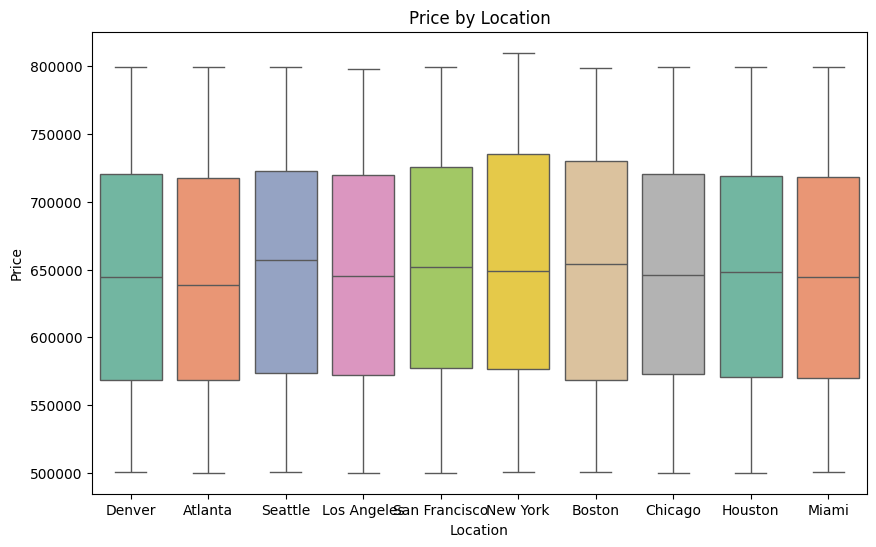

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='price', data=df, palette='Set2')
plt.title('Price by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

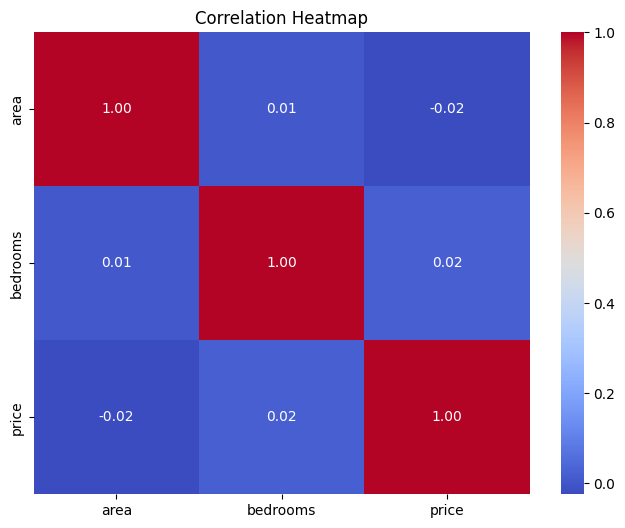

In [ ]:
plt.figure(figsize=(8, 6))
# Changed column names to match the DataFrame
corr = df[['area', 'bedrooms', 'price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for DataFrame output

# 2. Fit and transform the 'location' column
encoded_location = encoder.fit_transform(df[['location']])

# 3. Create a DataFrame from the encoded data
encoded_location_df = pd.DataFrame(encoded_location, columns=encoder.get_feature_names_out(['location']))

# 4. Concatenate the encoded data with the original DataFrame
data_encoded = pd.concat([df, encoded_location_df], axis=1)

# 5. Drop the original 'location' column
data_encoded = data_encoded.drop('location', axis=1)

# Now you can use 'data_encoded'
X = data_encoded.drop('price', axis=1)  # Assuming 'price' is the target column
y = data_encoded['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 76196.98103932937
Root Mean Squared Error: 87886.00449490584
